# Лабораторная работа №4 по курсу "Криптография"

In [1]:
from random import choice, randrange
import matplotlib.pyplot as plt
import numpy as np

Считываение текста, перевод всех буквенных символов в нижний регистр, исключение всех символов, кроме кириллицы.

In [2]:
def read(name):
    print('Reading text', name)
    with open(name, 'rt') as f:
        text = f.read().lower()
        print('Original length:', len(text))
        trimmedText = ''
        for c in text:
            if ord(c) >= ord('а') and ord(c) <= ord('я'):
                trimmedText += c
        print('Trimmed length:', len(trimmedText))
        
        return trimmedText

Составление словаря по тексту.

In [3]:
def readForWords(name):
    with open(name, 'rt') as f:
        return ' '.join(f.readlines())

def trimWord(word):
    res = ""
    for c in word:
        c = c.lower()
        if ord(c) >= ord('а') and ord(c) <= ord('я'):
            res += c
    return res

def addWords(name, words):
    text = readForWords(name)
    words = set(words)
    for word in text.split():
        word = trimWord(word)
        if len(word) > 0:
            words.add(word)
    return list(words)

Генерация случайных строк и текстов.

In [4]:
def randchar():
    return chr(randrange(ord('а'), ord('я')+1))

def randword():
    return choice(words)

def randstring(n):
    res = ""
    for _ in range(n):
        res += randchar()
    return res

def randtext(n):
    res = ""
    while len(res) < n:
        res += randword()
    return res

Сравнение текстов (если они разной длины, то символы буду сравниваться до конца меньшего текста).

In [5]:
def compare(text1, text2):
    result = 0
    for i in range(min(len(text1), len(text2))):
        if text1[i] == text2[i]:
            result += 1
    return result/min(len(text1), len(text2))

5 сравнений согласно заданию.

In [6]:
def fullCompare(text1, text2, n, verbose=True):
    randomStr1 = randstring(n)
    randomStr2 = randstring(n)
    randomText1 = randtext(n)
    randomText2 = randtext(n)
    
    comparation1 = compare(text1[:n], text2)
    comparation2 = compare(text1, randomStr1)
    comparation3 = compare(text1, randomText1)
    comparation4 = compare(randomStr1, randomStr2)
    comparation5 = compare(randomText1, randomText2)
    
    if verbose:
        print(f"Два осмысленных текста: {comparation1:.4f}")
        print(f"Осмысленный текст и текст из случайных букв: {comparation2:.4f}")
        print(f"Осмысленный текст и текст из случайных слов: {comparation3:.4f}")
        print(f"Два текста из случайных букв: {comparation4:.4f}")
        print(f"Два текста из случайных слов: {comparation5:.4f}")
    
    return comparation1, comparation2, comparation3, comparation4, comparation5

Построение графиков результатов для разных длин для упрощения анализа

In [7]:
def plotFullComparation(text1, text2, lengths, verbose=True):
    cH1 = [0]*len(lengths)
    cH2 = [0]*len(lengths)
    cH3 = [0]*len(lengths)
    cH4 = [0]*len(lengths)
    cH5 = [0]*len(lengths)
    for i, length in enumerate(lengths):
        print('Длина префикса:', length)
        cH1[i], cH2[i], cH3[i], cH4[i], cH5[i] = fullCompare(text1, text2, length, verbose)
        print('------------------------------------------------------')
    
    plt.figure(figsize=(20, 10))
    plt.xscale('log')
    plt.plot(lengths, cH1, label = "Два осмысленных текста")
    plt.plot(lengths, cH2, label = "Осмысленный текст и текст из случайных букв")
    plt.plot(lengths, cH3, label = "Осмысленный текст и текст из случайных слов")
    plt.plot(lengths, cH4, label = "Два текста из случайных букв")
    plt.plot(lengths, cH5, label = "Два текста из случайных слов")
    plt.legend()
    plt.show()

## Анализ

In [8]:
words = []

"Основание" - Айзек Азимов

In [9]:
text1 = read('./Foundation.txt')
words = addWords('./Foundation.txt', words)

Reading text ./Foundation.txt
Original length: 390969
Trimmed length: 310584


"Сияние" - Стивен Книг

In [10]:
text2 = read('./The_shining.txt')
words = addWords('./The_shining.txt', words)

Reading text ./The_shining.txt
Original length: 216599
Trimmed length: 170738


"Солярис" - Станислав Лем

In [11]:
text3 = read('./Solaris.txt')
words = addWords('./Solaris.txt', words)

Reading text ./Solaris.txt
Original length: 328744
Trimmed length: 260711


In [12]:
len(words)

27294

In [13]:
lengths = [100, 500, 1000, 5000, 10000, 50000, 100000, 200000, 250000]

Длина префикса: 100
Два осмысленных текста: 0.0900
Осмысленный текст и текст из случайных букв: 0.0200
Осмысленный текст и текст из случайных слов: 0.0660
Два текста из случайных букв: 0.0400
Два текста из случайных слов: 0.0600
------------------------------------------------------
Длина префикса: 500
Два осмысленных текста: 0.0680
Осмысленный текст и текст из случайных букв: 0.0260
Осмысленный текст и текст из случайных слов: 0.0496
Два текста из случайных букв: 0.0240
Два текста из случайных слов: 0.0438
------------------------------------------------------
Длина префикса: 1000
Два осмысленных текста: 0.0610
Осмысленный текст и текст из случайных букв: 0.0220
Осмысленный текст и текст из случайных слов: 0.0417
Два текста из случайных букв: 0.0370
Два текста из случайных слов: 0.0499
------------------------------------------------------
Длина префикса: 5000
Два осмысленных текста: 0.0584
Осмысленный текст и текст из случайных букв: 0.0312
Осмысленный текст и текст из случайных слов

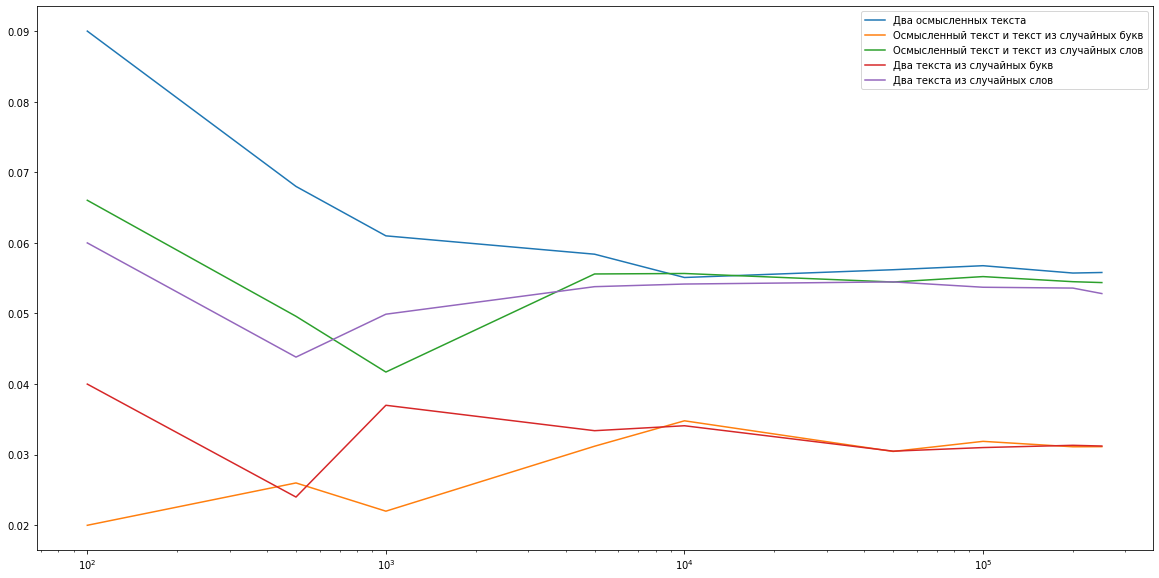

In [14]:
plotFullComparation(text1, text3, lengths)

## Распределение букв в тексте

In [15]:
def counts(text):
    count = [0 for _ in range(32)]
    for c in text:
        count[ord(c) - ord('а')] += 1
    return [i / len(text) for i in count]

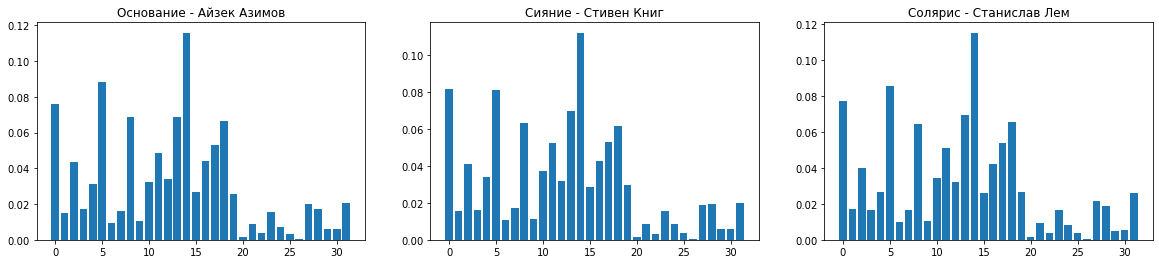

In [16]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.bar(range(32), counts(text1))
plt.title("Основание - Айзек Азимов")
plt.subplot(1, 3, 2)
plt.bar(range(32), counts(text2))
plt.title("Сияние - Стивен Книг")
plt.subplot(1, 3, 3)
plt.bar(range(32), counts(text3))
plt.title("Солярис - Станислав Лем")
plt.show()

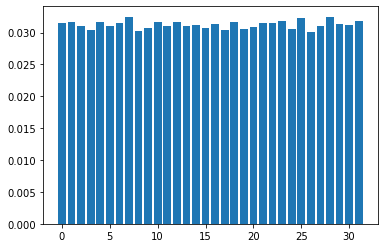

In [17]:
plt.bar(range(32), counts(randstring(10**5)))
plt.show()

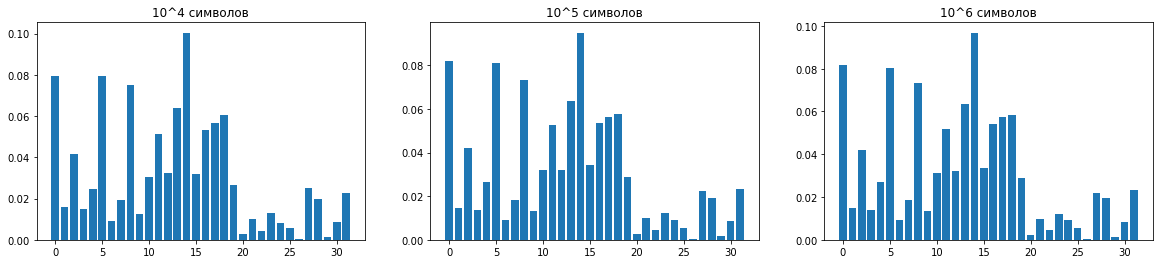

In [18]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.bar(range(32), counts(randtext(10**4)))
plt.title("10^4 символов")
plt.subplot(1, 3, 2)
plt.bar(range(32), counts(randtext(10**5)))
plt.title("10^5 символов")
plt.subplot(1, 3, 3)
plt.bar(range(32), counts(randtext(10**6)))
plt.title("10^6 символов")
plt.show()